<a href="https://colab.research.google.com/github/Anastasia6194/Nobel-Prize-Winners/blob/master/Datacamp_project_Nobel_prize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exploration of Nobel Prize Laureates List from 1901 to 2016




,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France




Top 10 Countries




,Count
United States of America,276
United Kingdom,88
Germany,70
France,53
Sweden,30
Japan,29
NaN,26
Russia,20
Netherlands,19
Italy,18




As we can see USA has the largest number of Nobel Prize Laureates




(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

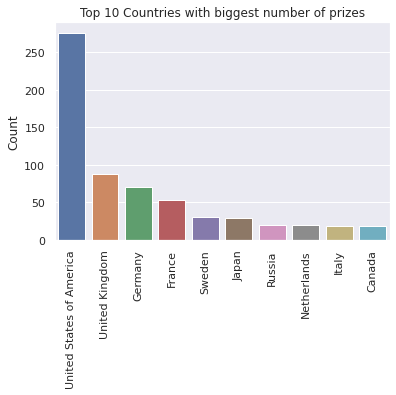

In [51]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

print('Exploration of Nobel Prize Laureates List from 1901 to 2016')
print('\n')

nobel = pd.read_csv('/content/drive/My Drive/Colab Notebooks/nobel.csv')
nobel = nobel.drop_duplicates()
display(nobel.head())

# User-defined function, making groupby easier

def count_entries(df, col_name):
    """Return a dictionary with counts of
    occurrences as value for each key."""

    # Initialize an empty dictionary: cols_count
    cols_count = {}

    # Extract column from DataFrame: col
    col = df[col_name]
    
    # Iterate over the column in DataFrame
    for entry in col:

        # If entry is in cols_count, add 1
        if entry in cols_count.keys():
            cols_count[entry] += 1

        # Else add the entry to cols_count, set the value to 1
        else:
            cols_count[entry] = 1
    df = pd.DataFrame.from_dict(cols_count, orient='index', columns = ['Count'])
    # Return the cols_count dictionary
    return df

#Country analysis
print('\n')
print ('Top 10 Countries')
print('\n')

count_country = count_entries(nobel, 'Birth Country').sort_values('Count', ascending = False)

display(count_country.head(11))
top_10_countries = count_country. head(11)
print('\n')
print ('As we can see USA has the largest number of Nobel Prize Laureates')
print('\n')

sns.set()

ax = sns.barplot(x=top_10_countries.index, y='Count', data=top_10_countries).set_title('Top 10 Countries with biggest number of prizes')
plt.xticks(rotation = 90)



When did USA start to dominate Nobel Prize Chart? 


From the history of the Nobel Prize we know that in the beginning that were only Europeans who were awarded the Prize.
When did USA nominees make it to the top?


According to the graph, we can be confident saying that in 1930-s Americans received way more awards than before


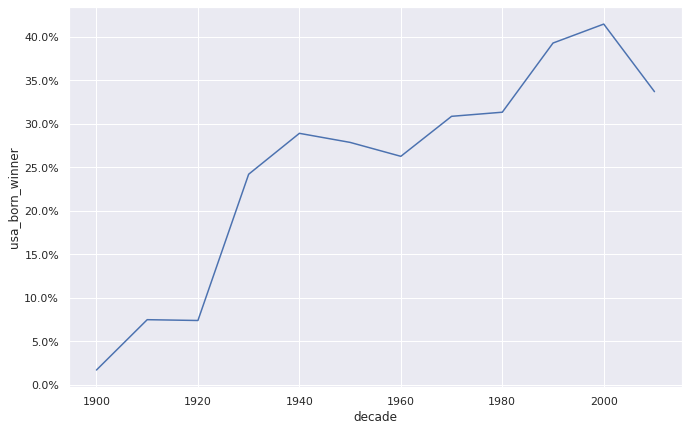

In [101]:
#2 When did USA start to dominate Nobel Prize Chart? 

print('When did USA start to dominate Nobel Prize Chart? ')
print('\n')
print ('From the history of the Nobel Prize we know that in the beginning that were only Europeans who were awarded the Prize.' + '\n'+ 'When did USA nominees make it to the top?')
print('\n')
print('According to the graph, we can be confident saying that in 1930-s Americans received way more awards than before')
USA = nobel[nobel['Birth Country']=='United States of America']
x = USA ['Year']
y = len(USA ['Laureate ID'])


# Calculating the proportion of USA born winners per decade
nobel['usa_born_winner'] = nobel['Birth Country']=='United States of America'
nobel['decade'] = (np.floor(nobel['Year']/10)*10).astype(int)
prop_usa_winners = nobel.groupby('decade', as_index = False)['usa_born_winner'].mean()


# Setting the plotting theme
sns.set()
# and setting the size of all plots.
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [11, 7]

# Plotting USA born winners 
ax = sns.lineplot(prop_usa_winners['decade'],prop_usa_winners['usa_born_winner'])

# Adding %-formatting to the y-axis
from matplotlib.ticker import PercentFormatter

ax.yaxis.set_major_formatter(PercentFormatter(1.0))

How many prizes were awarded in each category?


Most of prizes were given in Medicine category.
Economics has the smallest number of awards what is logical given the fact that the first Nobel Prize in Economics was given in the end of 1960s


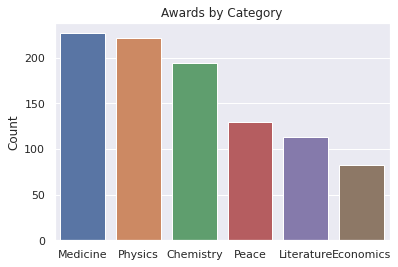

In [21]:
print('How many prizes were awarded in each category?')
print('\n')
print('Most of prizes were given in Medicine category.' + '\n' + 'Economics has the smallest number of awards what is logical given the fact that the first Nobel Prize in Economics was given in the end of 1960s')
count_category = count_entries(nobel, 'Category').sort_values('Count', ascending = False)
plot = sns.barplot(x = count_category.index,y = 'Count', data = count_category). set_title('Awards by Category')



What is the age split among Nobel Prize Laureates?


Most of awards are given to men but is there any difference in gender split among categories?


As we can see, most of awards men receive in Physics and Medicine categories, while women received most of prizes in Peace and Literature
Although the percentage of women among Nobel Prize Laureates is generally low, the difference among categories is profound. <1% of Laureates are women in Physics but in Peace category women take >15% of Prizes 


Sex,Female,Male,Perc_of_women
Category,,,
Physics,2,220,0.90
Medicine,12,215,5.29
Chemistry,4,190,2.06
Literature,14,99,12.39
Peace,16,88,15.38
Economics,2,81,2.41


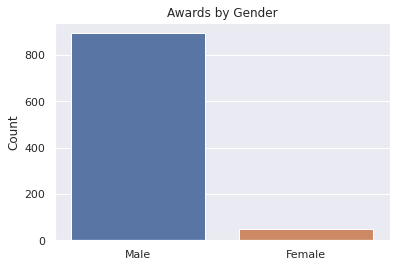

In [38]:
print('What is the age split among Nobel Prize Laureates?')
print('\n')
print('Most of awards are given to men but is there any difference in gender split among categories?')
print('\n')

count_gender = count_entries(nobel, 'Sex').sort_values('Count', ascending = False)

plot = sns.barplot(x = count_gender.index,y = 'Count', data = count_gender). set_title('Awards by Gender')

print('As we can see, most of awards men receive in Physics and Medicine categories, while women received most of prizes in Peace and Literature')
print('Although the percentage of women among Nobel Prize Laureates is generally low, the difference among categories is profound. <1% of Laureates are women in Physics but in Peace category women take >15% of Prizes ')

df_gender = nobel.pivot_table(index = 'Category', columns = 'Sex', aggfunc = 'count', values = 'Laureate ID')
df_gender = df_gender.sort_values(['Male', 'Female'], ascending = False)
df_gender['Perc_of_women'] = round(df_gender['Female'] / (df_gender['Male']+df_gender['Female']) *100, 2)
display(df_gender)



Male vs Female by Decade




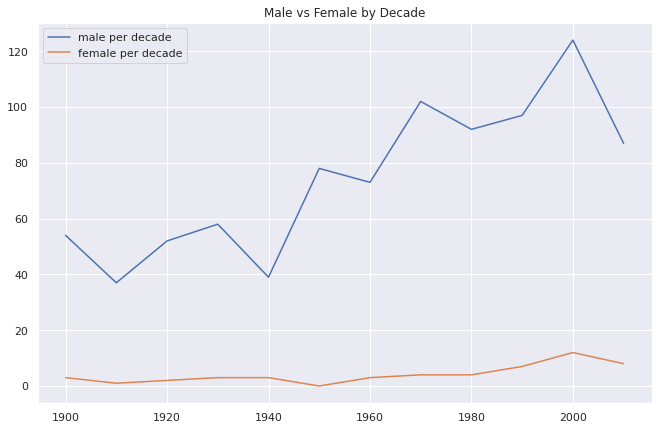

In [104]:
print('Male vs Female by Decade')
print('\n')

nobel['female'] = nobel['Sex']=='Female'
nobel['male'] = nobel['Sex']=='Male'
female_dev = nobel.groupby('decade', as_index =False)['female'].sum()
male_dev = nobel.groupby('decade', as_index =False)['male'].sum()

plt.plot(male_dev['decade'],male_dev['male'], label = 'male per decade')
plt.plot(female_dev['decade'],female_dev['female'], label = 'female per decade')
plt.legend ()
plt.title('Male vs Female by Decade')
plt.show()


Top Countries for Each Category


To understand what country brings the most awards in each category,
we can examine closer top 10 countries by splitting their performance by categories.
After examination we can conclude that:
USA loses first place in Literature category
UK takes the second place in Physics, Medicine and Economics while Germany makes it to the second place in Chemistry
France takes the first place in Literature and the second - in Peace category


      Category             Birth Country  Laureate ID
56     Physics  United States of America           70
55     Physics            United Kingdom           22
49     Physics                   Germany           19
51     Physics                     Japan           14
52     Physics               Netherlands            9
48     Physics                    France            8
53     Physics                    Russia            8
50     Physics                     Italy            5
47     Physics                    Canada     

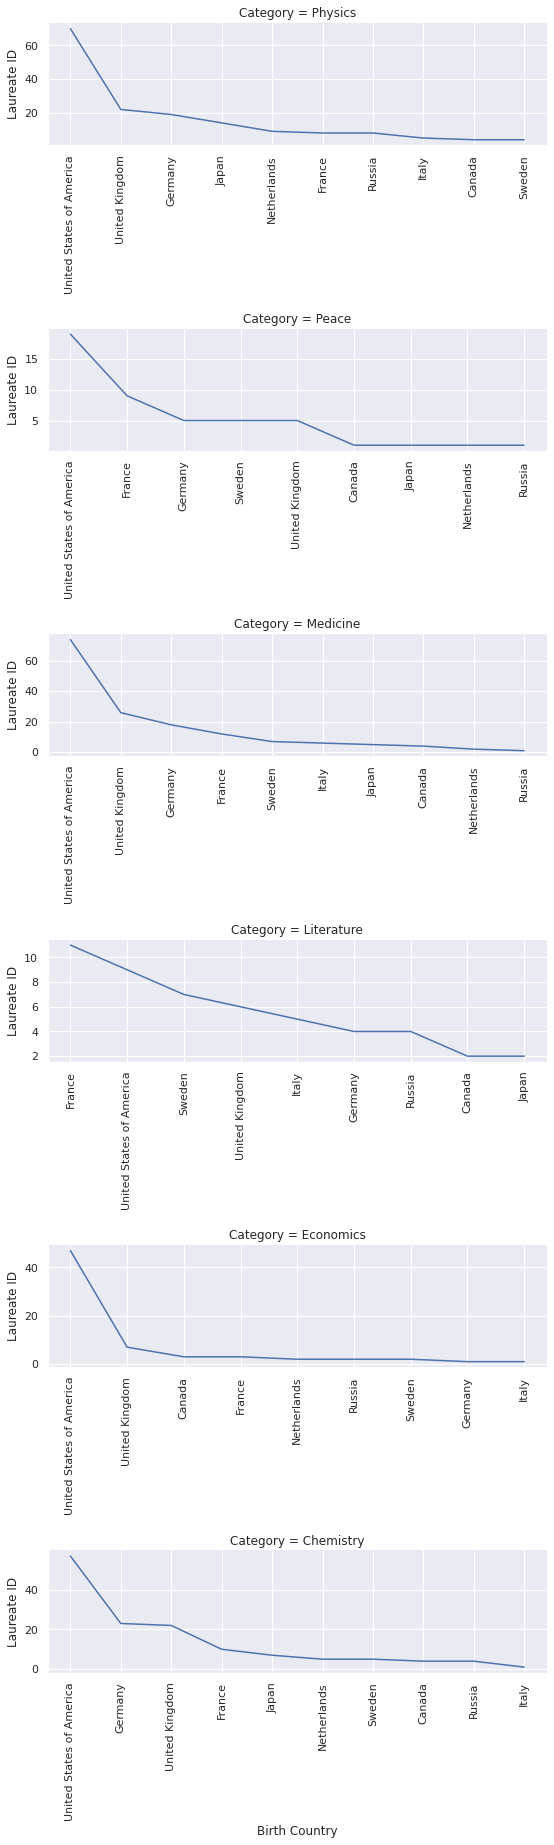

In [49]:
print('Top Countries for Each Category')
print('\n')
print('To understand what country brings the most awards in each category,' + '\n' + 'we can examine closer top 10 countries by splitting their performance by categories.'+ '\n'+ 'After examination we can conclude that:'+ '\n' 'USA loses first place in Literature category' + '\n' + 'UK takes the second place in Physics, Medicine and Economics while Germany makes it to the second place in Chemistry' + '\n' + 'France takes the first place in Literature and the second - in Peace category' )
print('\n')
top_countries = ['United States of America','United Kingdom','Germany','France','Sweden','Japan','Russia','Netherlands','Italy', 'Canada']

new_nobel = nobel[nobel['Birth Country'].isin(top_countries)]
new_nobel_grouped = new_nobel.groupby(['Category','Birth Country'], as_index = False)['Laureate ID'].count()
new_nobel_grouped = new_nobel_grouped.sort_values(['Category','Laureate ID'], ascending = False).groupby('Category').head(11)
print(new_nobel_grouped)

g = sns.FacetGrid(new_nobel_grouped, row="Category", sharex = False, sharey = False, aspect = 2, height = 4)
g.map(sns.lineplot, 'Birth Country', 'Laureate ID', sort = False)
plt.subplots_adjust(hspace = 1.5)

for ax in g.axes.flat:
  for label in ax.get_xticklabels():
    label.set_rotation(90)


What is typical age of Nobel Prize Laureate?


We can see the age for all laureates splitted by decade as well as the age of laureates in each category


In general, the age increased from 55 in 1900s to almost 70 in 2010s.


In particular, the most solid increase in the average age is seen in Physics and Chemistry. For Literature and Economics the average age is almost stable.
While for all categories the trend for the average age is increasing, for Peace category we can see the decreasing trend with several laureates below 40 and even 20 y.o.


Another interesting fact is that the age is quite different for all laureates that makes it interesting to examine the youngest and the oldest Nobel prize laureate.




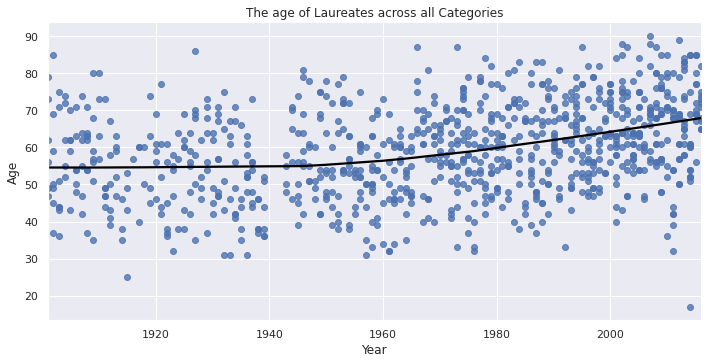

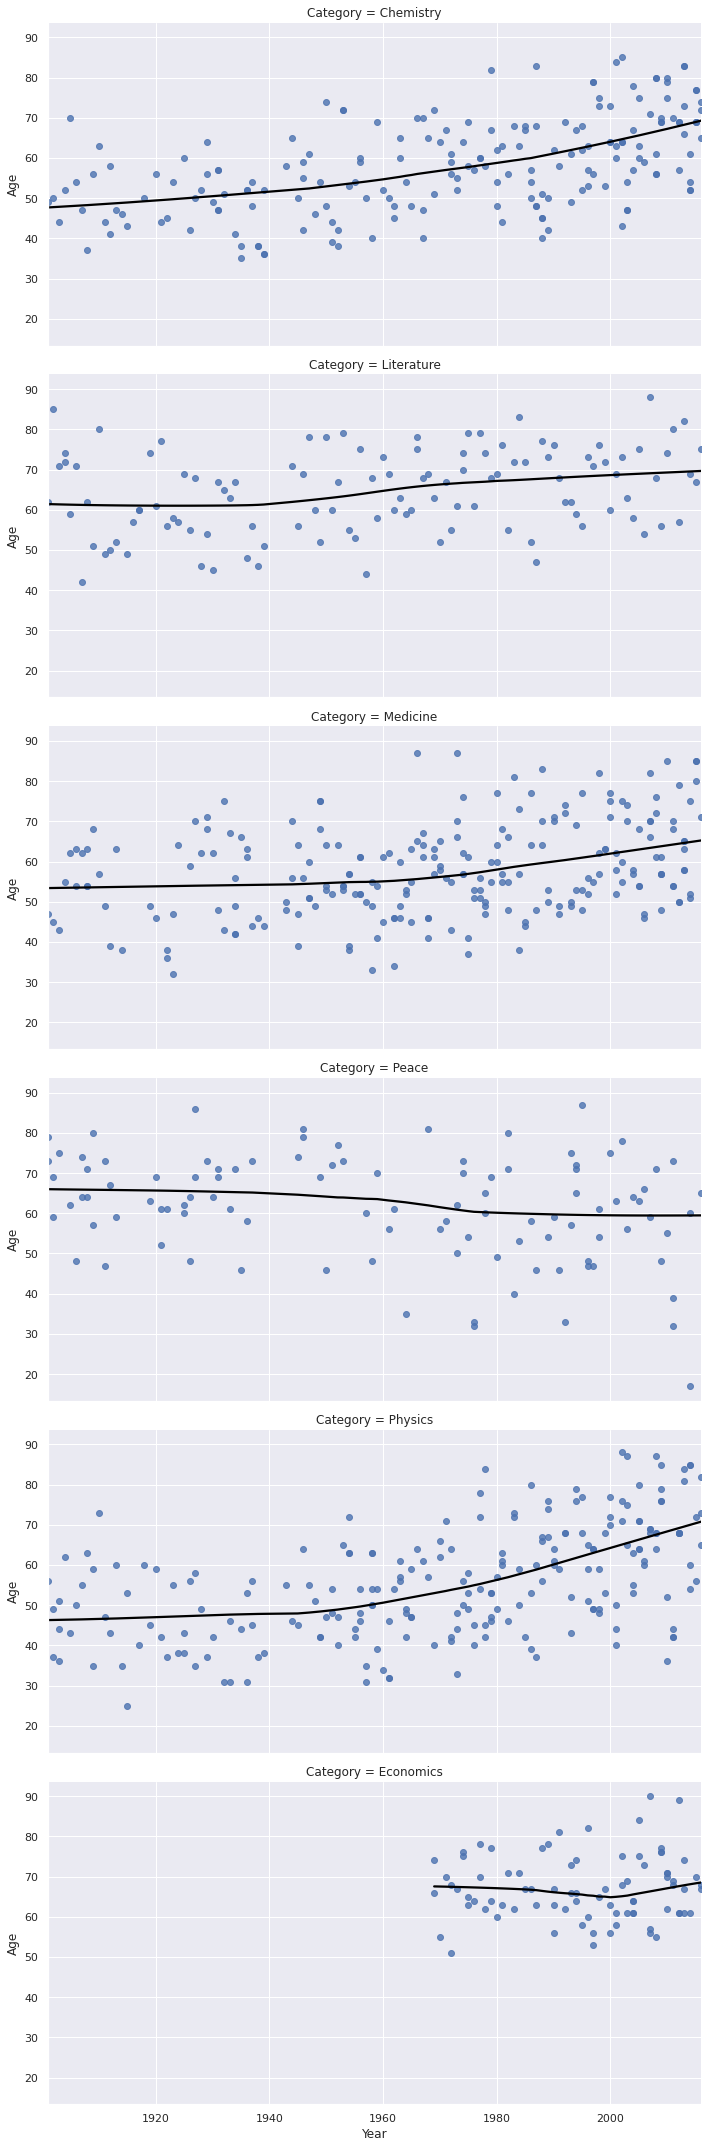

In [63]:
print('What is typical age of Nobel Prize Laureate?')
print('\n')
print('We can see the age for all laureates splitted by decade as well as the age of laureates in each category')
print('\n')
print('In general, the age increased from 55 in 1900s to almost 70 in 2010s.')
print('\n')
print('In particular, the most solid increase in the average age is seen in Physics and Chemistry. For Literature and Economics the average age is almost stable.'+'\n'+ 'While for all categories the trend for the average age is increasing, for Peace category we can see the decreasing trend with several laureates below 40 and even 20 y.o.')
print('\n')
print('Another interesting fact is that the age is quite different for all laureates that makes it interesting to examine the youngest and the oldest Nobel prize laureate.')
print('\n')


#Nobel Prize by Age

nobel = nobel [nobel['Birth Date'].astype(str).str.contains('.*-00-00')!=True]

#nobel = pd.DataFrame(nobel)

# Converting birth_date from String to datetime
nobel['Birth Date'] = pd.to_datetime(nobel['Birth Date'])
nobel['Birth Year'] = nobel['Birth Date'].dt.year
nobel['Age'] = nobel['Year']-nobel['Birth Year']

# Plotting the age of Nobel Prize winners
ax = sns.lmplot(x='Year', y = 'Age', data = nobel,lowess=True, aspect=2, line_kws={'color' : 'black'} )
plt.title('The age of Laureates across all Categories')

sns.lmplot(x='Year', y = 'Age', row = 'Category', data = nobel,lowess=True, aspect=2, line_kws={'color' : 'black'} )


In [130]:
print('The youngest and the oldest Nobel Prize Laureate')
print('\n')
# The oldest winner of a Nobel Prize as of 2016
youngest = nobel.nsmallest(1, 'Age')
# The youngest winner of a Nobel Prize as of 2016
oldest = nobel.nlargest(1, 'Age')

display(youngest[['Year','Category','Full Name','Birth Country', 'Age']], oldest[['Year','Category','Full Name','Birth Country', 'Age']])




The youngest and the oldest Nobel Prize Laureate




,Year,Category,Full Name,Birth Country,Age
940,2014,Peace,Malala Yousafzai,Pakistan,17.0


,Year,Category,Full Name,Birth Country,Age
825,2007,Economics,Leonid Hurwicz,Russia,90.0
